# Capstone Project — The Battle of Neighborhoods

### Introduction
<p>New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. It has a population that exceeds 30 million.</p>
 <p>New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.</p> 
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.

So as part of this project , we will list and visualise all major parts of New Delhi City .
</p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in New Delhi City for Italian Cuisine ? 
- Which areas have large number of Italian Restaurant? 
- Which all areas have less number of restaurant ?
- What places are having best restaurant in New Delhi?

### Data
For this project we need the following data :
<ul>
<li> New Delhi Restaurants data that contains list Locality, Restaurant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of New Delhi city.
     </ul>
<li> Nearby places in each locality of New Delhi city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the New Delhi city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each restaurant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
done

# All requested packages already installed.



## Read the zomato resturant data from csv file

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/DennisLeyo/BattleofNeighborhoods/main/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [6]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [7]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [8]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [9]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters 

In [10]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [11]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        4  
2        4  
3        4  
4        4  
5        4

## What places are have best restaurant in New Delhi?

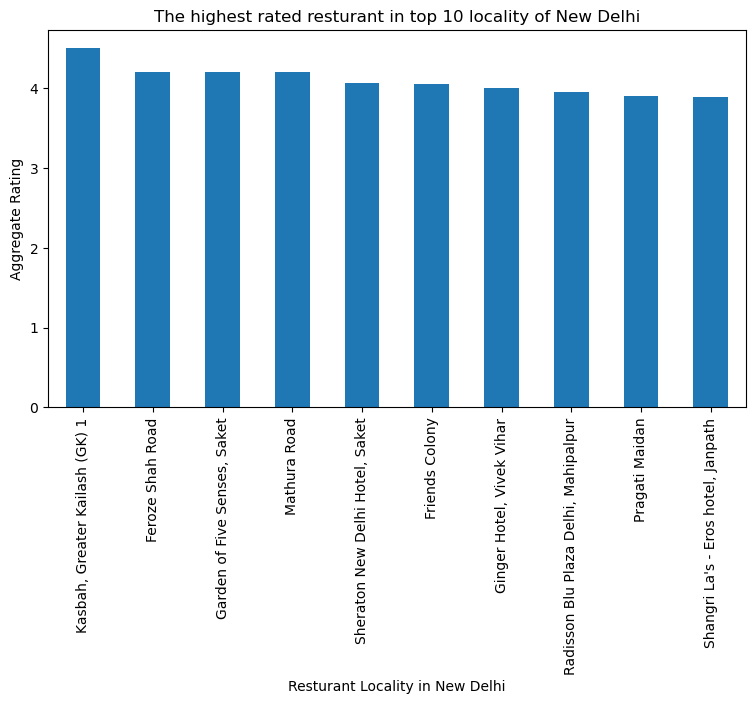

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in <b>Kesbah, Greater Kailash area.</b>

## what places are have worst restaurants in New Delhi?

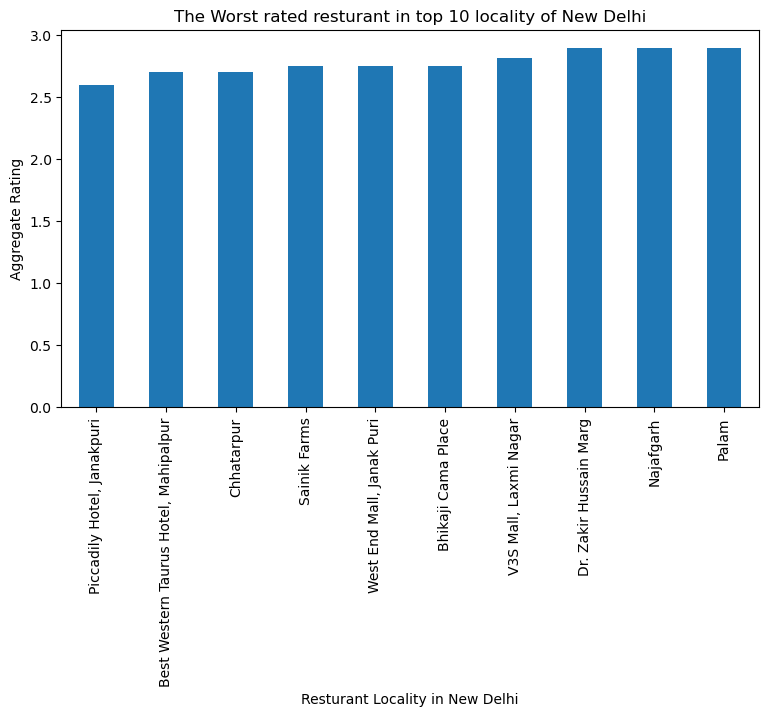

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in <b>Piccadily Hotel, Janakpuri.</b>

## Which place are suitable for foodie person in New Delhi city?

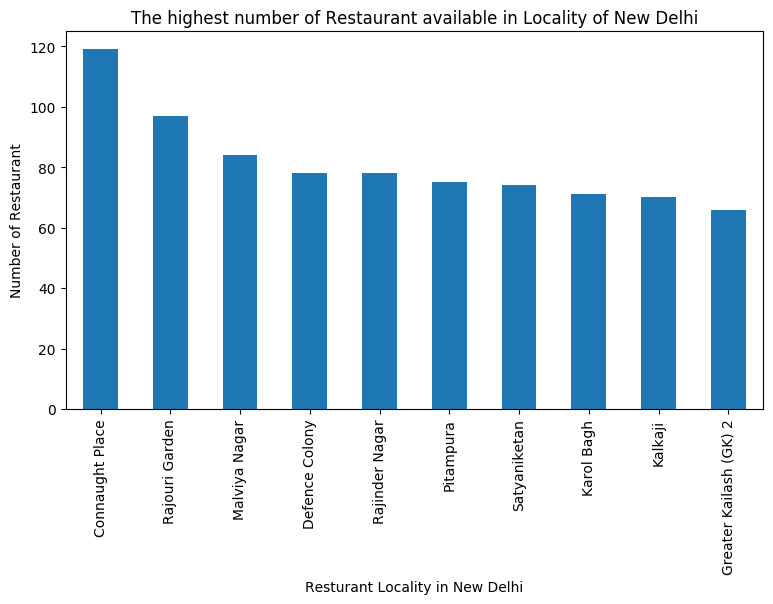

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Connaught Place</b> is the best places for foodie person to stay there.

## Which place are not suitable for foodie person in New Delhi city?

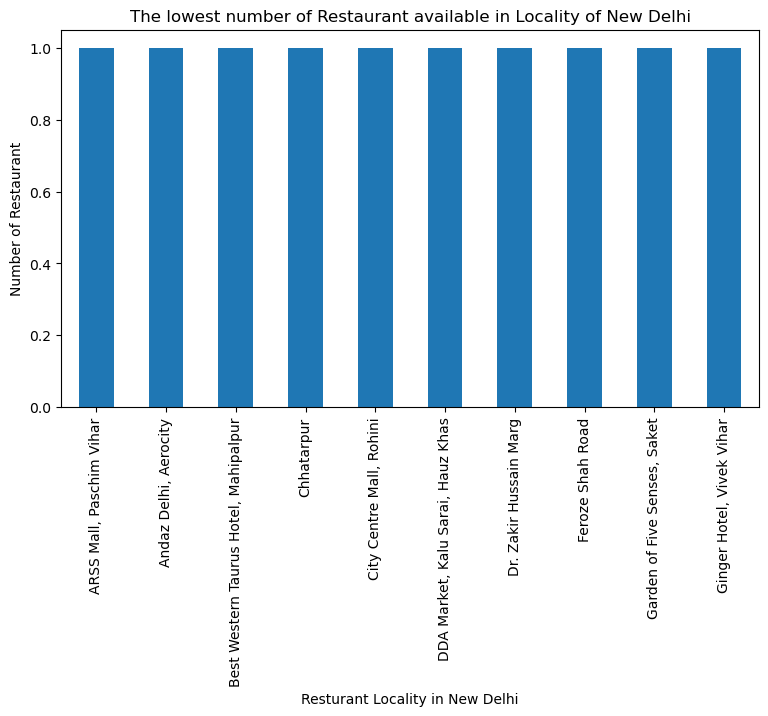

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for Italian restaurant in New Delhi city

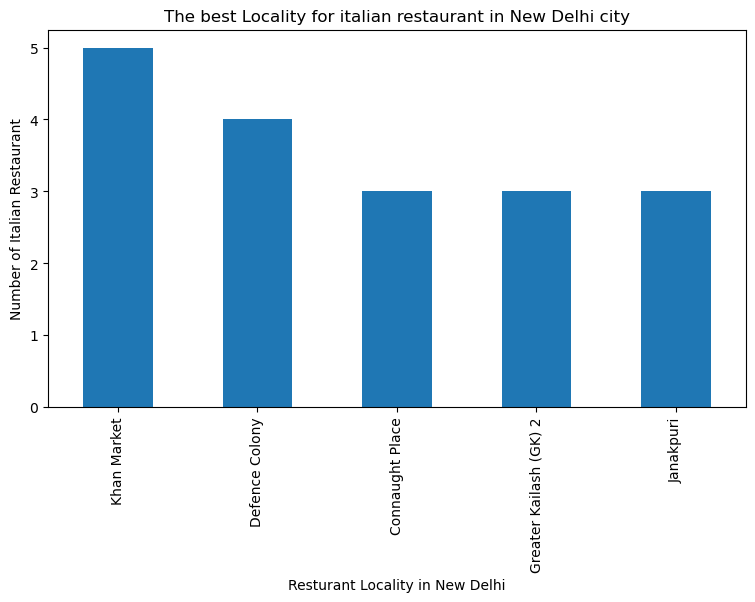

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for italian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Italian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Italian Restaurant')

#displays the plot
plt.show()

<b>Khan Market</b> is the best place for Italian restaurant.

## which places have more Italian resturants in New Delhi?  

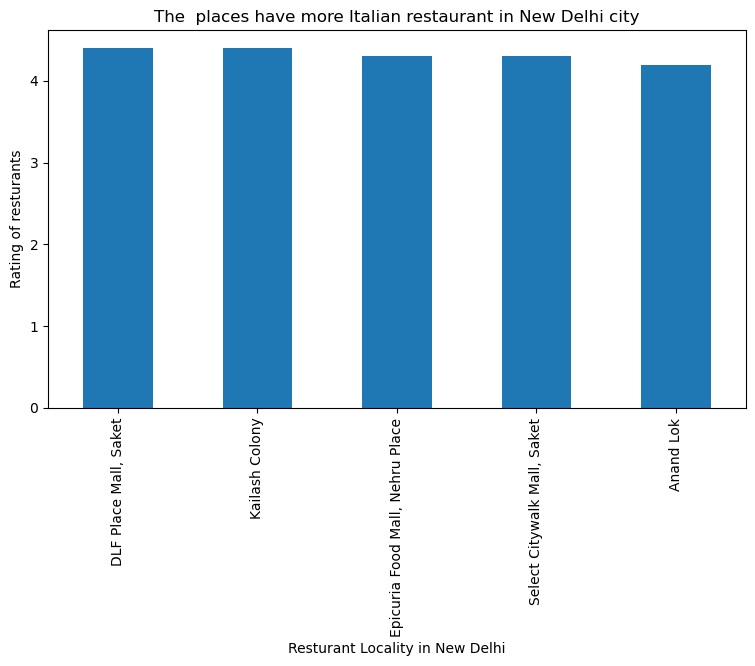

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The  places have more Italian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Italian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b> DLF Palace Mall, Kailash Colony</b>  have more Italian resturants.

### Data transformation
Based on Locality grouping the data

In [17]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [18]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [19]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [20]:

## Define Foursquare Credentials and Version
CLIENT_ID = '' # Foursquare ID
CLIENT_SECRET = '' # Foursquare Secret
VERSION = '20180605' # Foursquare API version


## create a function to repeat the same process to all the Locality in New Delhi

In [21]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [24]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [25]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [26]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         7                   7      7   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 16                  16     16   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          34                  34     34   
Yusuf Sarai                                    11                  11     11   
ibis New Delhi, Aerocity                       32                  32     32   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      7                7   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              16               16   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       34               34   
Yusuf Sarai                                 11               11   
ibis New Delhi, Aerocity                    32               32   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      7  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              16  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       34  
Yusuf Sarai                                 11  
ibis New Delhi, Aerocity                    32  

[238 rows x 6 columns]

In [27]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 210 uniques categories.


In [28]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Train Station  Turkish Restaurant  \
0                0                 0  ...              0                   0   
1                0                 0  ...              0                   0   
2                0                 0  ...              0                   0   
3                0                 0  ...              0                   0   
4                0                 0  ...              0                   0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0                              0                      0   
1                 0                              0                      0   
2                 0                              0                      0   
3                 0                              0                      0   
4                 0                              0                      0   

   Whisky Bar  Wine Bar  Wings Joint  Women's Store  Yoga Studio  
0           0         0            0              0            0  
1           0         0            0              0            0  
2           0         0            0              0            0  
3           0         0            0              0            0  
4           0         0            0              0            0  

[5 rows x 211 columns]

In [29]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.029412   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
233                0.0                 0.0      0.0                 0.0   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Train Station  \
0          0.000000              0.0          0.000000  ...       0.000000   
1          0.000000              0.0          0.000000  ...       0.000000   
2          0.000000              0.0          0.000000  ...       0.000000   
3          0.142857              0.0          0.142857  ...       0.000000   
4          0.000000              0.0          0.000000  ...       0.000000   
..              ...              ...               ...  ...            ...   
233        0.000000              0.0          0.000000  ...       0.000000   
234        0.000000              0.0          0.000000  ...       0.000000   
235        0.000000              0.0          0.000000  ...       0.029412   
236        0.000000              0.0          0.000000  ...       0.000000   
237        0.000000              0.0          0.000000  ...       0.031250   

     Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0.0               0.0                       0.000000   
1                   0.0               0.0                       0.000000   
2                   0.0               0.0                       0.000000   
3                   0.0               0.0                       0.000000   
4                   0.0               0.0                       0.000000   
..                  ...               ...                            ...   
233                 0.0               0.0                       0.000000   
234                 0.0               0.0                       0.000000   
235                 0.0               0.0                       0.029412   
236                 0.0               0.0                       0.000000   
237                 0.0               0.0                       0.031250   

     Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  \
0                      0.0         0.0       0.0          0.0            0.0   
1                      0.0         0.0       0.0          0.0            0.0   
2                      0.0         0.0       0.0          0.0            0.0   
3                      0.0         0.0       0.0          0.0            0.0   
4                      0.0         0.0       0.0          0

In [30]:
New_Delhi_grouped.shape

(238, 211)

In [31]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                  Sandwich Place  0.11
3                          Market  0.11
4  Multicuisine Indian Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2   Parsi Restaurant  0.14
3        Coffee Shop  0.14
4                Pub  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2      Shopping Mall   0.2
3          Multiplex   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1   Rental Car Location  0.14
2        Airport Lounge  0.14
3  Fast Food Restaurant  0.14
4           Coffee Shop  0.14


----Aggarwal City Mall, Pitampura----
              venue  freq
0  Department Store  0.25
1       Pizza Place  0.25
2        Donut Shop  0.25
3 

In [32]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura      Department Store   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar           Pizza Place   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                     ATM        Sandwich Place                Market   
1                    Café      Parsi Restaurant           Coffee Shop   
2       Indian Restaurant         Shopping Mall             Multiplex   
3     Rental Car Location        Airport Lounge  Fast Food Restaurant   
4             Pizza Place            Donut Shop                  Food   
..                    ...                   ...                   ...   
233                  Café             Multiplex   American Restaurant   
234     Indian Restaurant                  Park  Fast Food Restaurant   
235       Bed & Breakfast     Indian Restaurant                   Spa   
236           Coffee Shop      Asian Restaurant                 Hotel   
237                   Spa                Lounge           Coffee Shop   

              5th Most Common Venue           6th Most Common Venue  \
0    Multicuisine Indian Restaurant                     Coffee Shop   
1                               Pub                             ATM   
2                              Café                           Hotel   
3                       Coffee Shop                Airport Terminal   
4                    Nightlife Spot  Multicuisine Indian Restaurant   
..                              ...                             ...   
233       Middle Eastern Restaurant                      Hookah Bar   
234                             ATM         New American Restaurant   
235                          Lounge                     Coffee Shop   
236             Japanese Restaurant               Korean Restaurant   
237               Indian Restaurant             Dumpling Restaurant   

    7th Most Common Venue           8th Most Common Venue  \
0      Chinese Restaurant                     Pizza Place   
1          Nightlife Spot  Multicuisine Indian Restaurant   
2                     ATM              Mughlai Restaurant   
3             Music Store                     Music Venue   
4               Multiplex                          Museum   
..                    ...                             ...   
233            Restaurant                     Snack Place   
234         Moving Target              Mughlai Restaurant   
235    Punjabi Restaurant                      Food Court   
236                  Park                  Ice Cream Shop   
237                Buffet              Punjabi Restaurant   

              9th Most Common Venue   10th Most Common Venue  
0                  Udupi Restaurant                   Mosque  
1                         Multiplex                   Museum  
2    Multicuisine Indian Restaurant                   Museum  
3           North Indian Restaurant            National Park  
4                       Music Store              Music Venue  
..                              ...                      ...  
233              Chinese Restaurant        Indian Restaurant  
234  Multicuisine Indian Restaurant                Multiplex  
235                          Bakery                Hotel Bar  
236                             Bar  New American Restaurant  
237                      Food Court                   Bakery  

[238 rows x 11 columns]

In [34]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [36]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               3   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               3   
3                         Average           59               2   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM        Sandwich Place   
1     Indian Restaurant                  Café      Parsi Restaurant   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel   Rental Car Location        Airport Lounge   
4      Department Store           Pizza Place            Donut Shop   

  4th Most Common Venue           5th Most Common Venue  \
0                Market  Multicuisine Indian Restaurant   
1           Coffee Shop                             Pub   
2             Multiplex                            Café   
3  Fast Food Restaurant                     Coffee Shop   
4                  Food                  Nightlife Spot   

            6th Most Common Venue 7th Most Common Venue  \
0                     Coffee Shop    Chinese Restaurant   
1                             ATM        Nightlife Spot   
2                           Hotel                   ATM   
3                Airport Terminal           Music Store   
4  Multicuisine Indian Restaurant             Multiplex   

            8th Most Common Venue           9th Most Common Venue  \
0                     Pizza Place                Udupi Restaurant   
1  Multicuisine Indian Restaurant                       Multiplex   
2              Mughlai Restaurant  Multicuisine Indian Restaurant   
3                     Music Venue         North Indian Restaurant   
4                          Museum                     Music Store   

  10th Most Common Venue  
0                 Mosque  
1                 Museum  
2                 Museum  
3          National Park  
4            Music Venue

In [37]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [38]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
4    28.690020    3.033333                                    Average   
15   28.691136    3.390909                   Average, Good, Very Good   
26   28.538688    3.130303                        Average, Good, Poor   
34   28.720602    3.600000                                       Good   
38   28.702961    3.225000                              Average, Good   
50   28.645084    3.235000             Average, Good, Poor, Very Good   
57   28.699837    3.376471                   Average, Good, Very Good   
73   28.643037    3.000000                                    Average   
80   28.611614    3.366667                              Average, Good   
90   28.642755    3.450000                              Average, Good   
96   28.516316    3.200000                                    Average   
103  28.652501    3.080000                        Average, Good, Poor   
105  28.526489    3.300000                              Average, Good   
107  28.569394    3.252381                              Average, Good   
109  28.689561    3.311111                         Average, Very Good   
125  28.627715    3.125000                              Average, Good   
131  28.705307    3.800000                                       Good   
134  28.656939    3.234783             Average, Good, Poor, Very Good   
136  28.658244    3.240000                              Average, Good   
137  28.708865    3.008696                              Average, Good   
139  28.613451    2.900000                                    Average   
150  28.592401    2.900000                                    Average   
151  28.592153    3.200000                                    Average   
153  28.608055    3.860000                   Average, Good, Very Good   
166  28.569093    3.175000             Average, Good, Poor, Very Good   
176  28.562460    3.269231             Average, Good, Poor, Very Good   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   
184  28.528743    3.764000  Average, Excellent, Good, Poor, Very Good   
186  28.548922    3.715385  Average, Excellent, Good, Poor, Very Good   
187  28.629634    2.942857                                    Average   
189  28.620715    3.880000                   Average, Good, Very Good   
197  28.592724    2.985714                                    Average   
201  28.651299    3.500000                              Average, Good   
211  28.579556    3.780000                                       Good   
223  28.619954    2.905714                              Average, Poor   

     No_of_Votes  Cluster Labels    1st Most Common Venue  \
4            126               0         Department Store   
15           485               0  South Indian Restaurant   
26          2578               0                   Market   
34           119               0              Pizza Place   
38           168               0        Convenience Store   
50          2578               0              Pizza Place   
57          2460               0              Pizza Place   
73             7               0              Pizza Place   
80           291               0      Government Building   
90           322               0              Pizza Place   
96            95               0                      ATM   
103         2196               0        Fish & Chips Shop   
105          228               0            Shopping Mall   
107         1525               0              Pizza Place   
109          903               0                Gastropub   
125          171               0                   Garden   
131          727               0        Convenience Store   
134         1477               0            Metro Station   
136          567               0      Fried Chicken Joint   
137          187               0      Indie Movie Theater   
139            4               0                      ATM   
150           74               0        

In [39]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
5    28.700516    3.040000                  Average, Good, Poor          594   
11   28.562580    3.750000             Average, Good, Very Good          875   
13   28.690182    3.090000                  Average, Good, Poor          971   
14   28.693969    3.378571                        Average, Good         2343   
18   28.696302    3.300000                        Average, Good          415   
22   28.654105    3.085714                              Average           80   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
36   28.692546    3.480000                        Average, Good          948   
48   28.630149    2.950000                  Average, Good, Poor          471   
51   28.557166    3.080000                   Average, Very Good         1120   
87   28.582031    3.117143       Average, Good, Poor, Very Good         2140   
94   28.538153    3.117143                  Average, Good, Poor         3642   
95   28.681154    3.453448             Average, Good, Very Good         5267   
101  28.667644    3.300000                              Average          132   
104  28.656263    3.097619                        Average, Good          965   
106  28.575525    3.126316                        Average, Good          998   
110  28.635391    3.040385       Average, Good, Poor, Very Good         2442   
130  28.724100    3.133333                              Average          325   
132  28.706295    3.256000             Average, Good, Very Good         1717   
142  28.693270    3.519149             Average, Good, Very Good         7642   
154  28.618935    2.900000                              Average            9   
156  28.630734    3.185714                        Average, Good          244   
157  28.629505    2.600000                              Average           67   
160  28.712975    3.066667                              Average          121   
163  28.552711    3.100000                              Average            7   
169  28.667261    3.200000                              Average           76   
180  28.534499    3.000000                  Average, Good, Poor          173   
192  28.526856    4.066667                            Very Good          802   
193  28.569983    3.133333                  Average, Good, Poor          988   
195  28.527731    3.450000                        Average, Good          396   
218  28.552403    3.833333                      Good, Very Good         1133   
220  28.523519    3.700000                                 Good          281   
221  28.560593    3.733333             Average, Good, Very Good          615   
224  28.636921    2.819231                  Average, Good, Poor         2265   
225  28.524070    3.686364             Average, Good, Very Good         4001   
227  28.559704    3.278261             Average, Good, Very Good         1043   
230  28.658041    3.400000                              Average           19   
232  28.667344    3.077273                  Average, Good, Poor          939   
233  28.695096    3.050000                              Average           86   
234  28.630044    2.750000                        Average, Poor          238   

     Cluster Labels  1st Most Common Venue          2nd Most Common Venue  \
5                 1            Pizza Place                      Multiplex   
11                1  Performing Arts Venue            Japanese Restaurant   
13                1           Dessert Shop                    Snack Place   
14                1            Pizza Place               Asian Restaurant   
18                1            Pizza Place               Asian Restaurant   
22                1   Fast Food Restaurant                    Pizza Place   
24                1                 Mosque  Paper / Office Supplies Store   
36                1   Fast Food Restaurant              Indian Restaurant   
48                1         Sandwich 

In [40]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553076    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631362    3.537500                        Average, Good         1666   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 2                 Hotel   Rental Car Location   
10                2                 Hotel                   Spa   
19                2                 Hotel    Italian Restaurant   
35                2                 Hotel      Asian Restaurant   
56                2                 Hotel                  Café   
60                2                 Hotel     Indian Restaurant   
69                2                 Hotel       Bed & Breakfast   
70                2                 Hotel            Restaurant   
74                2                 Hotel     Indian Restaurant   
83                2                 Hotel                   Spa   
111               2                 Hotel            Restaurant   
112               2                 Hotel                   Spa   
119               2                 Hotel                   Spa   
120               2    Italian Restaurant     Indian Restaurant   
128               2                 Hotel                   ATM   
148               2            Donut Shop  Fast Food Restaurant   
161               2           Pizza Place        Ice Cream Shop   
162               2                  Café                 Hotel   
167               2         Women's Store  Gym / Fitness Center   
168               2                 Hotel                   Spa   
173               2      Department Store     Indian Restaurant   
188               2           Pizza Place     Convenienc

In [41]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
2    28.656131    3.275000                              Average, Good   
12   28.641698    3.050000                                    Average   
23   28.656414    3.358182                   Average, Good, Very Good   
25   28.495624    2.700000                                    Average   
33   28.657388    3.320000                              Average, Good   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
46   28.573241    3.225000                        Average, Good, Poor   
47   28.681582    3.046875                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
61   28.668181    3.400000                                    Average   
65   28.556980    3.272414                        Average, Good, Poor   
66   28.699373    3.252174                              Average, Good   
71   28.641003    3.650000                              Average, Good   
76   28.576785    3.200000                              Average, Good   
77   28.631728    3.060714             Average, Good, Poor, Very Good   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
98   28.651527    3.490909                   Average, Good, Very Good   
99   28.648795    3.238028             Average, Good, Poor, Very Good   
108  28.563827    3.800000                            Good, Very Good   
113  28.541242    2.984615                                    Average   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
124  28.521760    4.200000                                  Very Good   
126  28.602860    2.973214                        Average, Good, Poor   
133  28.708185    3.344444                   Average, Good, Very Good   
138  28.556145    3.040909                        Average, Good, Poor   
144  28.591092    3.200000                        Average, Good, Poor   
152  28.544464    3.525000                         Average, Very Good   
155  28.669160    3.148214                        Average, Good, Poor   
159  28.613748    3.900000                         Average, Excellent   
164  28.668055    3.393333        Average, Excellent, Good, Very Good   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
198  28.636712    3.023529                              Average, Poor   
208  28.562469    2.971429                        Average, Good, Poor   
210  28.661133    3.775000                            Good, Very Good   
214  28.561105    3.425000                              Average, Good   
222  28.628988    3.260000                        Average, Good, Poor   
236  28.648177    3.675000                   Average, Good, Very Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
0            117               3     Indian Restaurant   
2            434               3           Pizza Place   
12            17               3     Indian Restaurant   
23          6668               3     Indian Restaurant   
25            23               3   Japanese Restaurant   
33           636               3     Indian Restaurant   
42           542               3     Indian Restaurant   
43          2570               3     Indian Restaurant   
44         15579               3    Italian Restaurant   
46          1106               3            Restaurant   
47          12

In [42]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
9    28.659870    3.281481                        Average, Good         1309   
..         ...         ...                                  ...          ...   
217  28.535183    3.066667                              Average           37   
226  28.525054    3.322222                        Average, Good         1940   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
231  28.637492    3.062264                  Average, Good, Poor         1253   

     Cluster Labels 1st Most Common Venue          2nd Most Common Venue  \
1                 4     Indian Restaurant                           Café   
6                 4            Steakhouse                    Coffee Shop   
7                 4           Coffee Shop           Fast Food Restaurant   
8                 4                  Café                        Stadium   
9                 4                  Café                            ATM   
..              ...                   ...                            ...   
217               4                 Hotel              Indian Restaurant   
226               4          Dessert Shop  Vegetarian / Vegan Restaurant   
228               4           Snack Place                            ATM   
229               4                  Café                      Pet Store   
231               4  Fast Food Restaurant                    Pizza Place   

    3rd Most Common Venue 4th Most Common Venue  \
1        Parsi Restaurant           Coffee Shop   
6       Food & Drink Shop                Market   
7          Clothing Store                  Café   
8            Dessert Shop           Golf Course   
9            Burger Joint         Burrito Place   
..                    ...                   ...   
217                   ATM             Nightclub   
226                   Bar                  Bank   
228                 Motel         Moving Target   
229           Cheese Shop              Tea Room   
231     Indian Restaurant        Ice Cream Shop   

              5th Most Common Venue           6th Most Common Venue  \
1                               Pub                             ATM   
6           New American Restaurant                             ATM   
7                     Shopping Mall              Italian Restaurant   
8                       Music Venue                     Coffee Shop   
9    Multicuisine Indian Restaurant                       Multiplex   
..                              ...                             ...   
217                   Moving Target              Mughlai Restaurant   
226                            Café            Fast Food Restaurant   
228              Mughlai Restaurant  Multicuisine Indian Restaurant   
229                          Bakery                     Coffee Shop   
231                             ATM              Mughlai Restaurant   

              7th Most Common Venue           8th Most Common Venue  \
1                    Nightlife Spot  Multicuisine Indian Restaurant   
6                         Nightclub              Mughlai Restaurant   
7                  Asian Restaurant              Chinese Restaurant   
8              Other Great Outdoors                           Hotel   
9                            Museum                     Music Store   
..                              ...                             ...   
217  Multicuisine Indian Restaurant                       Multiplex   
226              Chinese Restaurant                     Pizza Place   
228                       Multip

### Conclusion 
- DLF palace Mall, Kailash Colony are some of the best neighborhoods for Italian cuisine.
- Khan Market, defence Colony have the best Italian Restaurant. 
- Cannaught place, Rajouri garden, Malviya nagar are the best places for foodie person.
- Greater kailash, Feroze shah road, Saket have best restaurants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    